<a href="https://colab.research.google.com/github/Ang-Li-code/MAT422/blob/main/HW_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concepts in Linear Algebra, Part 3

The following code will provide examples that demonstrate principles observed in the subjects of singular value decomposition, low rank matrix approximations, and principal component analysis.

This will be accomplished by showing how these techniques are performed on sample datasets and an additional example of image compression utilizing low rank matrix approximations

## Singular Value Decomposition

We learned that for a given n x m matrix $A$, it can be decomposed into 3 separate matrices, $U$ (m x m), $s$ (m x n), and $V$ (n x n)

The following code will generate a random matrix $A$, perform singular value decomposition on it, and show that $U * S * V = A$

In [30]:
import numpy as np
import random

def create_sigma(s, n, m):
  sigma = np.eye(n, m)

  for i in range(min(n, m)):
    sigma[i][i] = s[i]

  return sigma

n = random.randrange(2, 10)
m = random.randrange(2, 10)

A = np.random.randint(0, 100, size=(n, m))

print("Matrix A", A.shape,":\n", A)

U, s, V = np.linalg.svd(A, full_matrices=True)

sigma = create_sigma(s, n, m)

print("\nU:", U.shape, "\n", U)
print("s:", sigma.shape, "\n", sigma)
print("V:", V.shape, "\n", V)

newA = U.dot(sigma.dot(V))

print("\nU * s * V = \n", newA)

Matrix A (8, 5) :
 [[73 77 47 28 48]
 [46 63 65 54 95]
 [ 2 53  4 74 48]
 [40 93 35 79 20]
 [99 36 18 82 78]
 [23 31 80 58 40]
 [73 69 42 43 40]
 [55 85  5 49 80]]

U: (8, 8) 
 [[-0.35371499  0.06499749  0.28133989  0.47714357  0.17039744  0.23902837
  -0.4945308  -0.48281709]
 [-0.41321683 -0.2120438   0.25917982 -0.32005499  0.49553907 -0.60049157
   0.05744443 -0.07232524]
 [-0.2520548  -0.12832145 -0.63270234 -0.36255596  0.03603327  0.2478975
   0.12857391 -0.55584178]
 [-0.35627236 -0.2879096  -0.47244965  0.41468181 -0.34973449 -0.41535716
  -0.20684268  0.23955941]
 [-0.41494679  0.53560604  0.18734704 -0.40521332 -0.55732354 -0.08236737
  -0.15559439  0.00671225]
 [-0.27889099 -0.65395721  0.2954914  -0.24024955 -0.19607485  0.47646566
  -0.06360229  0.28286859]
 [-0.34687684  0.06213609  0.18422929  0.37916779 -0.13527507  0.07277658
   0.8149434  -0.10187444]
 [-0.37867053  0.36477344 -0.27165832  0.02837414  0.48418893  0.33045458
  -0.02089648  0.55215018]]
s: (8, 5) 
 [[3

# Low Rank Matrix Approximations

We learned that by utilizing singular value decompositions, we can obtain the best $k$ rank approximation, $A_k$, for any given matrix $A$, where $A_K = \sum_{n = 1}^k \sigma_ju_jv^T_j$ and $\sigma_j$, $u_j$, and $v^T_j$ correspond to the singular values of $A$ (values in the diagonals of s in singular value decompositions), and the column vectors of $U$ and $V$, respectively.

The following code will perform low rank approximations on a random matrix A and show how the approximation gets closer to A for increasing values of k.

This will be first shown through numeric matrices, then show through an example of image compression. To reduce the amount of space taken, the possible dimensions of A will be reduced.

In [55]:
n = random.randrange(3, 5)
m = random.randrange(3, 5)

A = np.random.randint(0, 100, size=(n, m))

print("Matrix A", A.shape,":\n", A)

U, s, V = np.linalg.svd(A, full_matrices=True)

sigma = create_sigma(s, n, m)

print("\nU:", U.shape, "\n", U)
print("s:", s.shape, "\n", s)
print("V:", V.shape, "\n", V)

for i in range(1, min(n, m) + 1):
  print("\nk =", i)

  newA = np.matrix(U[:, :i]) * sigma[:i,:i] * np.matrix(V[:i, :])

  # print("U: ", U[:, :i])
  # print("s: ", sigma[:i, :i])
  # print("V: ", V[:i, :])
  print("A = \n", newA)

Matrix A (4, 4) :
 [[25 93 87  8]
 [10 59 88 82]
 [32 28 20 82]
 [67 92 46 19]]

U: (4, 4) 
 [[-0.55137684  0.47620952  0.38047972 -0.56959921]
 [-0.56872823 -0.46550291  0.47821897  0.48079294]
 [-0.32667374 -0.628251   -0.47254854 -0.52467402]
 [-0.51557352  0.40228376 -0.63501155  0.41123236]]
s: (4,) 
 [219.73927862  87.60122857  57.90731434   2.32747281]
V: (4, 4) 
 [[-0.29338719 -0.64354739 -0.58372689 -0.39879021]
 [ 0.16094738  0.41371442  0.07312689 -0.89307826]
 [-0.74900978 -0.13906513  0.63072349 -0.14776037]
 [ 0.57184286 -0.62876707  0.50606645 -0.14678033]]

k = 1
A = 
 [[35.54654145 77.97165378 70.72385274 48.31708223]
 [36.66516323 80.42536059 72.94947693 49.83758292]
 [21.06022757 46.19579587 41.90169768 28.62637843]
 [33.23834834 72.90861175 66.13144227 45.17964181]]

k = 2
A = 
 [[42.26070929 95.23038746 73.77445342 11.06094833]
 [30.10194995 63.55465481 69.96746288 86.25608762]
 [12.20239821 23.42679134 37.87711848 77.77743997]
 [38.91022293 87.48813601 68.70847413

image Matrix (675, 450) : 
 [[255. 255. 255. ...  98. 100. 100.]
 [255. 255. 255. ...  98.  99.  99.]
 [255. 255. 255. ...  97.  97.  97.]
 ...
 [  0.   0.   0. ...   9.  11.  11.]
 [  0.   0.   0. ...   9.  11.  11.]
 [  0.   0.   0. ...   9.  11.  11.]]


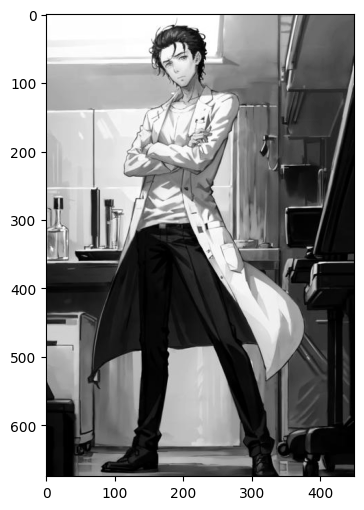

In [76]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/rintarou.jpeg")
imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

print("image Matrix", imgmat.shape, ": \n", imgmat)

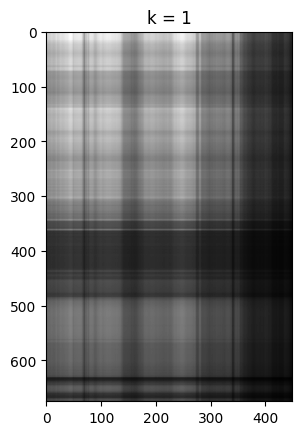

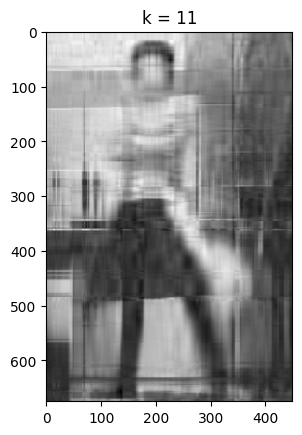

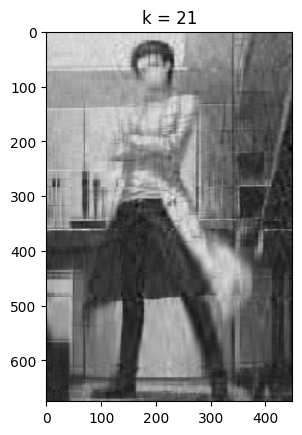

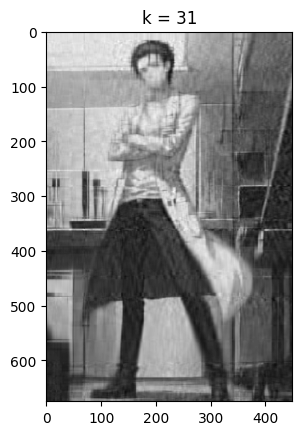

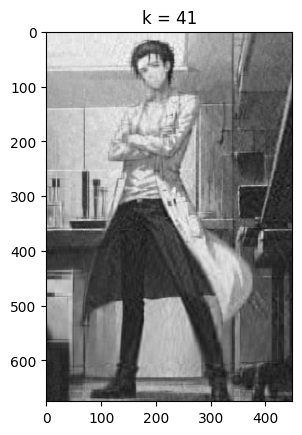

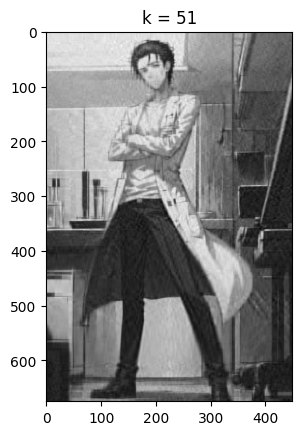

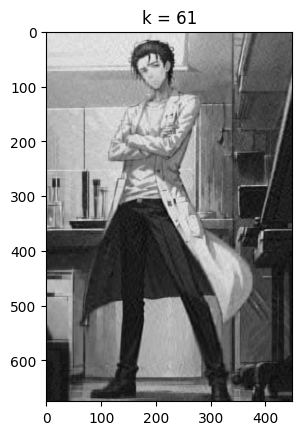

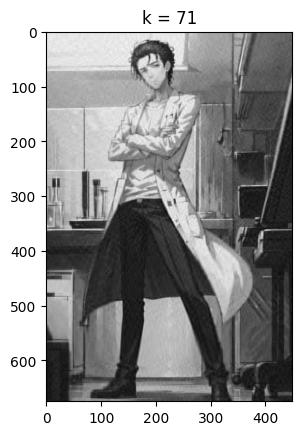

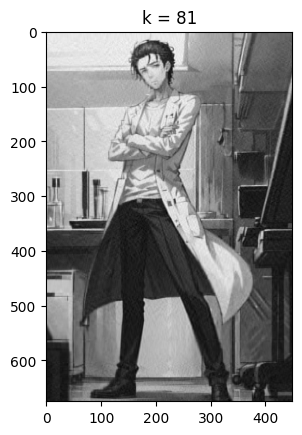

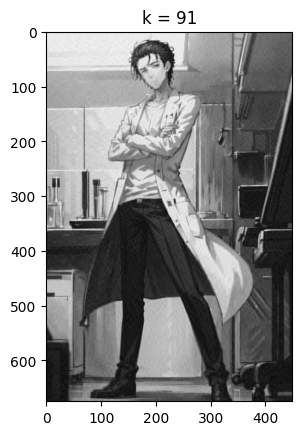

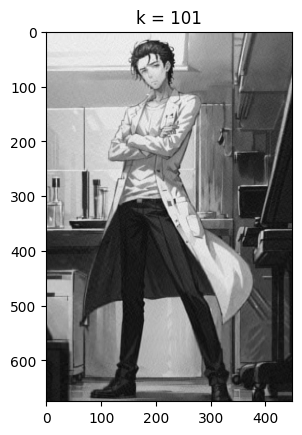

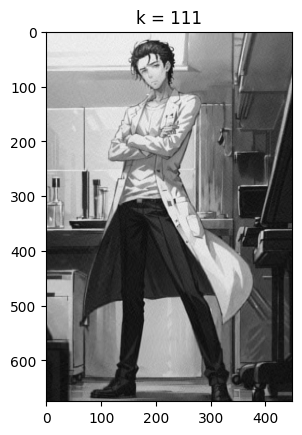

In [83]:
U, s, V = np.linalg.svd(imgmat)

s = create_sigma(s, 675, 450)

for i in range(1, 112, 10):
  compressed_img = np.matrix(U[:, :i]) * s[:i,:i] * np.matrix(V[:i, :])
  plt.imshow(compressed_img, cmap='gray')
  title = "k = %s" % i
  plt.title(title)
  plt.show()